In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Select companies by sector

In [2]:

listings = pd.read_excel('data/stock_data/listings.xlsx', sheet_name='nyse', na_values='n/a')

/Users/nyashamasamba/anaconda3/envs/rules_vs_random/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
listings

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,DDD,3D Systems Corporation,14.48,1.647165e+09,NaN,Technology,Computer Software: Prepackaged Software
1,MMM,3M Company,188.65,1.127366e+11,NaN,Health Care,Medical/Dental Instruments
2,WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
3,WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing"
4,AHC,A.H. Belo Corporation,6.20,1.347351e+08,NaN,Consumer Services,Newspapers/Magazines
...,...,...,...,...,...,...,...
3142,ZB^H,Zions Bancorporation,25.30,0.000000e+00,NaN,NaN,NaN
3143,ZBK,Zions Bancorporation,28.86,0.000000e+00,NaN,Finance,Major Banks
3144,ZOES,"Zoe&#39;s Kitchen, Inc.",17.07,3.325561e+08,2014.0,Consumer Services,Restaurants
3145,ZTS,Zoetis Inc.,53.10,2.610544e+10,2013.0,Health Care,Major Pharmaceuticals


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


In [5]:

# The index is currently a RangeIndex
# Make the Stock Symbol column the index
listings.set_index('Stock Symbol', inplace=True)
listings.head()

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
DDD,3D Systems Corporation,14.48,1.647165e+09,NaN,Technology,Computer Software: Prepackaged Software
MMM,3M Company,188.65,1.127366e+11,NaN,Health Care,Medical/Dental Instruments
WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing"
AHC,A.H. Belo Corporation,6.20,1.347351e+08,NaN,Consumer Services,Newspapers/Magazines


In [6]:

# Drop rows with missing sector data
listings.dropna(subset=['Sector'], inplace=True)

In [7]:

# Select companies with IPO Year before 2019
listings = listings[listings['IPO Year'] < 2019]
listings.head()

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing"
ATEN,"A10 Networks, Inc.",8.72,5.959822e+08,2014.0,Technology,Computer Communications Equipment
AAC,"AAC Holdings, Inc.",8.08,1.914187e+08,2014.0,Health Care,Medical Specialities
ABBV,AbbVie Inc.,64.13,1.021961e+11,2012.0,Health Care,Major Pharmaceuticals


In [8]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, WBAI to ZTO
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           967 non-null    object 
 1   Last Sale              967 non-null    float64
 2   Market Capitalization  967 non-null    float64
 3   IPO Year               967 non-null    float64
 4   Sector                 967 non-null    object 
 5   Industry               967 non-null    object 
dtypes: float64(3), object(3)
memory usage: 52.9+ KB


In [9]:

# Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=False))

Sector
Consumer Services        240
Finance                  132
Energy                   113
Technology               108
Public Utilities          76
Basic Industries          66
Capital Goods             61
Consumer Non-Durables     47
Health Care               43
Transportation            37
Miscellaneous             25
Consumer Durables         19
dtype: int64


In [10]:

# Select largest company for each sector
# These will make up our sector market-cap-weighted index
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)
print(components.sort_values(ascending=False)) # sorted by market cap

Sector                 Stock Symbol
Miscellaneous          BABA            2.755250e+11
Technology             ORCL            1.810461e+11
Health Care            ABBV            1.021961e+11
Transportation         UPS             9.018089e+10
Finance                GS              8.884059e+10
Consumer Non-Durables  ABEV            8.824020e+10
Basic Industries       RIO             7.043148e+10
Public Utilities       TEF             5.460981e+10
Capital Goods          GM              5.008634e+10
Consumer Services      LVS             4.438430e+10
Energy                 PAA             2.222300e+10
Consumer Durables      WRK             1.235490e+10
Name: Market Capitalization, dtype: float64


In [11]:

# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

Index(['RIO', 'GM', 'WRK', 'ABEV', 'LVS', 'PAA', 'GS', 'ABBV', 'BABA', 'TEF',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')


In [12]:

# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

                                    Company Name  Market Capitalization  \
Stock Symbol                                                              
BABA               Alibaba Group Holding Limited           2.755250e+11   
ORCL                          Oracle Corporation           1.810461e+11   
ABBV                                 AbbVie Inc.           1.021961e+11   
UPS                  United Parcel Service, Inc.           9.018089e+10   
GS               Goldman Sachs Group, Inc. (The)           8.884059e+10   
ABEV                                  Ambev S.A.           8.824020e+10   
RIO                                Rio Tinto Plc           7.043148e+10   
TEF                                Telefonica SA           5.460981e+10   
GM                        General Motors Company           5.008634e+10   
LVS                        Las Vegas Sands Corp.           4.438430e+10   
PAA           Plains All American Pipeline, L.P.           2.222300e+10   
WRK                      

In [13]:

# We'll need current prices to calculate returns for the companies in our index
stock_prices = pd.read_csv('data/stock_data/stock_data.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.head())

             AAPL   AMGN    AMZN  CPRT     EL      GS   ILMN     MA    PAA  \
Date                                                                         
2010-01-04  30.57  57.72  133.90  4.55  24.27  173.08  30.55  25.68  27.00   
2010-01-05  30.63  57.22  134.69  4.55  24.18  176.14  30.35  25.61  27.30   
2010-01-06  30.14  56.79  132.25  4.53  24.25  174.26  32.22  25.56  27.29   
2010-01-07  30.08  56.27  130.00  4.50  24.56  177.67  32.77  25.39  26.96   
2010-01-08  30.28  56.77  133.52  4.52  24.66  174.31  33.15  25.40  27.05   

              RIO    TEF    UPS  
Date                             
2010-01-04  56.03  28.55  58.18  
2010-01-05  56.90  28.53  58.28  
2010-01-06  58.64  28.23  57.85  
2010-01-07  58.65  27.75  57.41  
2010-01-08  59.30  27.57  60.17  


In [14]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB


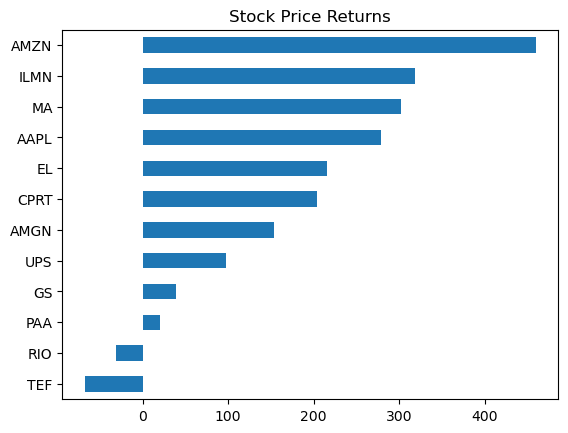

In [15]:

# Calculate the returns
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh', title='Stock Price Returns')
plt.show()

## Compute sector company returns

In [16]:

# Calculate the number of shares
index_companies = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]
num_shares = index_companies['Market Capitalization'].div(index_companies['Last Sale'])
print(num_shares.sort_values(ascending=False))

Stock Symbol
ABEV    1.570110e+10
TEF     5.037805e+09
ORCL    4.114684e+09
BABA    2.500000e+09
RIO     1.808718e+09
ABBV    1.593577e+09
GM      1.500040e+09
UPS     8.692972e+08
LVS     7.939946e+08
PAA     7.234050e+08
GS      3.978174e+08
WRK     2.504034e+08
dtype: float64


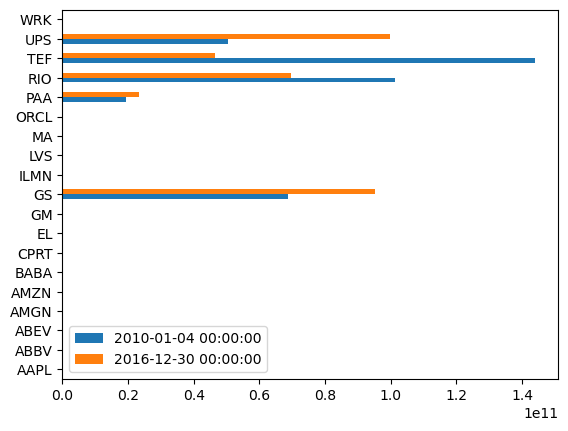

In [17]:

# Create the series of market cap per ticker
market_cap = stock_prices.mul(num_shares)

# Select first and last market cap
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]

# Concatenate and plot first and last market cap
pd.concat([first_value, last_value], axis=1).plot(kind='barh')
plt.show()

## Create sector market cap-weighted index

In [18]:

# Aggregate market cap by trading day
raw_index = market_cap.sum(axis=1)

# Normalize the aggregated market cap
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

Date
2010-01-04    100.000000
2010-01-05    100.779442
2010-01-06    100.911402
2010-01-07    100.478033
2010-01-08    100.841594
                 ...    
2016-12-23     87.466534
2016-12-27     87.634748
2016-12-28     87.360883
2016-12-29     87.091345
2016-12-30     86.996655
Length: 1762, dtype: float64


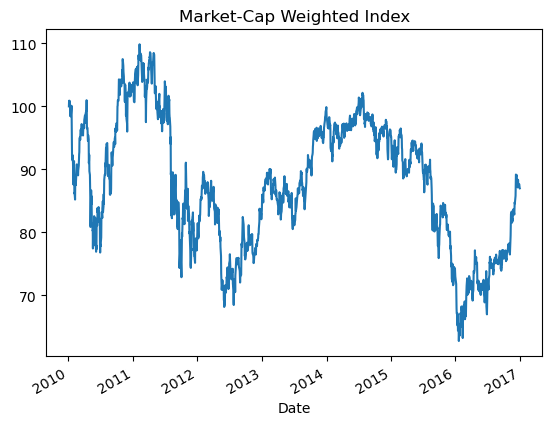

In [19]:

# Plot the index
index.plot(title='Market-Cap Weighted Index')
plt.show()

## Calculate the contibution of each stock to the index

In [20]:


index_return = (index.iloc[-1]/index.iloc[0] - 1) * 100

market_cap = index_companies['Market Capitalization']
total_market_cap = market_cap.sum()

weights = market_cap.div(total_market_cap)
print(weights.sort_values())

Stock Symbol
WRK     0.011438
PAA     0.020575
LVS     0.041092
GM      0.046371
TEF     0.050559
RIO     0.065207
ABEV    0.081695
GS      0.082251
UPS     0.083492
ABBV    0.094616
ORCL    0.167617
BABA    0.255088
Name: Market Capitalization, dtype: float64


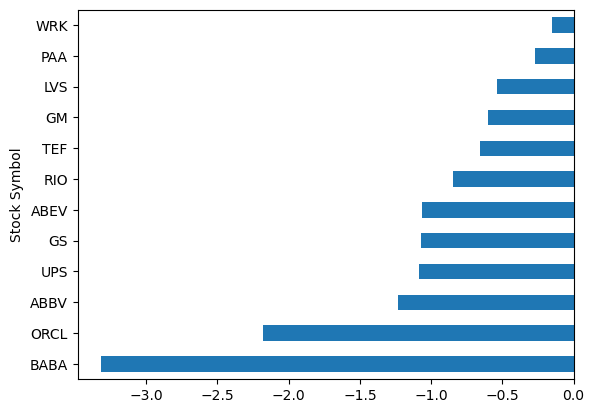

In [21]:

# Plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()

## Compare index performance to benchmark

In [22]:

idx_data = index.to_frame('Index') # Convert index series to dataframe

# Load benchmark data
djia = pd.read_csv('data/stock_data/djia2.csv', parse_dates=['DATE'], index_col='DATE')
djia.head()

,DJIA
DATE,
2010-01-04,100.000000
2010-01-05,99.887188
2010-01-06,99.902872
2010-01-07,100.216365
2010-01-08,100.323414


Index   -13.003345
DJIA     86.722172
dtype: float64


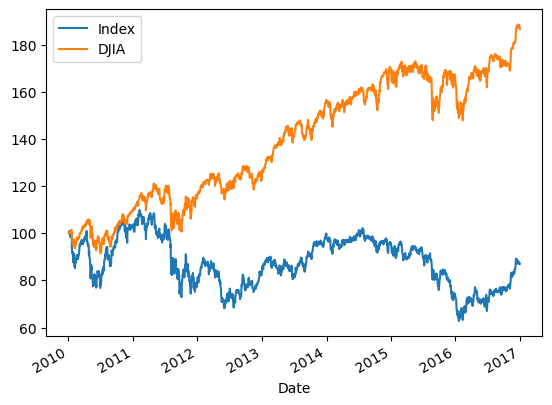

In [23]:

# add benchmark column to index data
idx_data['DJIA'] = djia

# Show total return for both index and djia
print(idx_data.iloc[-1].div(idx_data.iloc[0]).sub(1).mul(100))

# Plot both series
idx_data.plot()
plt.show()

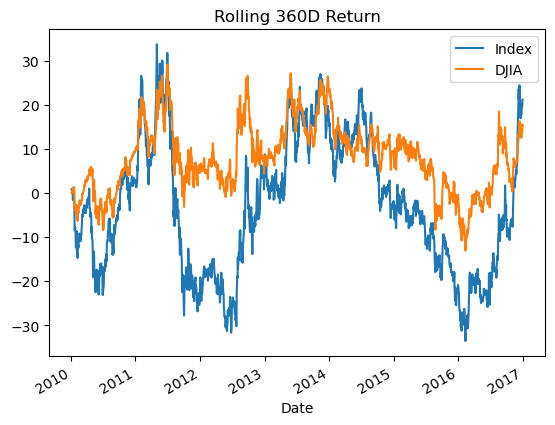

In [24]:

# Compare the index and DJIA on a rolling 360-day basis and determine when it would have been profitable to switch
def multi_period_return(r):
    return (np.prod(r + 1) - 1) * 100

rolling_return_360 = idx_data.pct_change().rolling('360D').apply(multi_period_return)

rolling_return_360.plot(title='Rolling 360D Return')
plt.show()

## Visualise index constituent correlations and export to Excel

In [25]:
sector_stocks = [i for i in tickers if i in stock_prices.columns]
returns = stock_prices.loc[:,sector_stocks].pct_change()
correlations = returns.corr()
print(correlations)

          RIO       PAA        GS       TEF       UPS
RIO  1.000000  0.337448  0.527298  0.559264  0.509809
PAA  0.337448  1.000000  0.271982  0.253598  0.217523
GS   0.527298  0.271982  1.000000  0.498230  0.506407
TEF  0.559264  0.253598  0.498230  1.000000  0.516242
UPS  0.509809  0.217523  0.506407  0.516242  1.000000


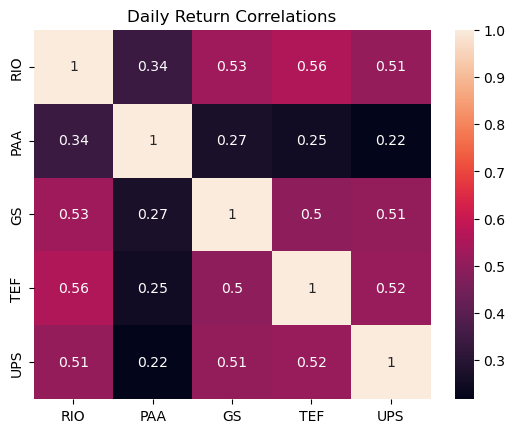

In [26]:

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show()

In [27]:
stock_idx_data = stock_prices.loc[:,sector_stocks].join(index.to_frame('Index'))
print(stock_idx_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RIO     1762 non-null   float64
 1   PAA     1762 non-null   float64
 2   GS      1762 non-null   float64
 3   TEF     1762 non-null   float64
 4   UPS     1762 non-null   float64
 5   Index   1762 non-null   float64
dtypes: float64(6)
memory usage: 96.4 KB
None


In [28]:
returns = stock_idx_data.pct_change()
stock_idx_data.index = stock_idx_data.index.date # keep only the date component of DateTimeIndex
# Export data and returns to excel (same workbook, different worksheets)
with pd.ExcelWriter('data/exported_stock_sector_data.xlsx') as writer:
    stock_idx_data.to_excel(writer, sheet_name='data')
    returns.to_excel(writer, sheet_name='returns')